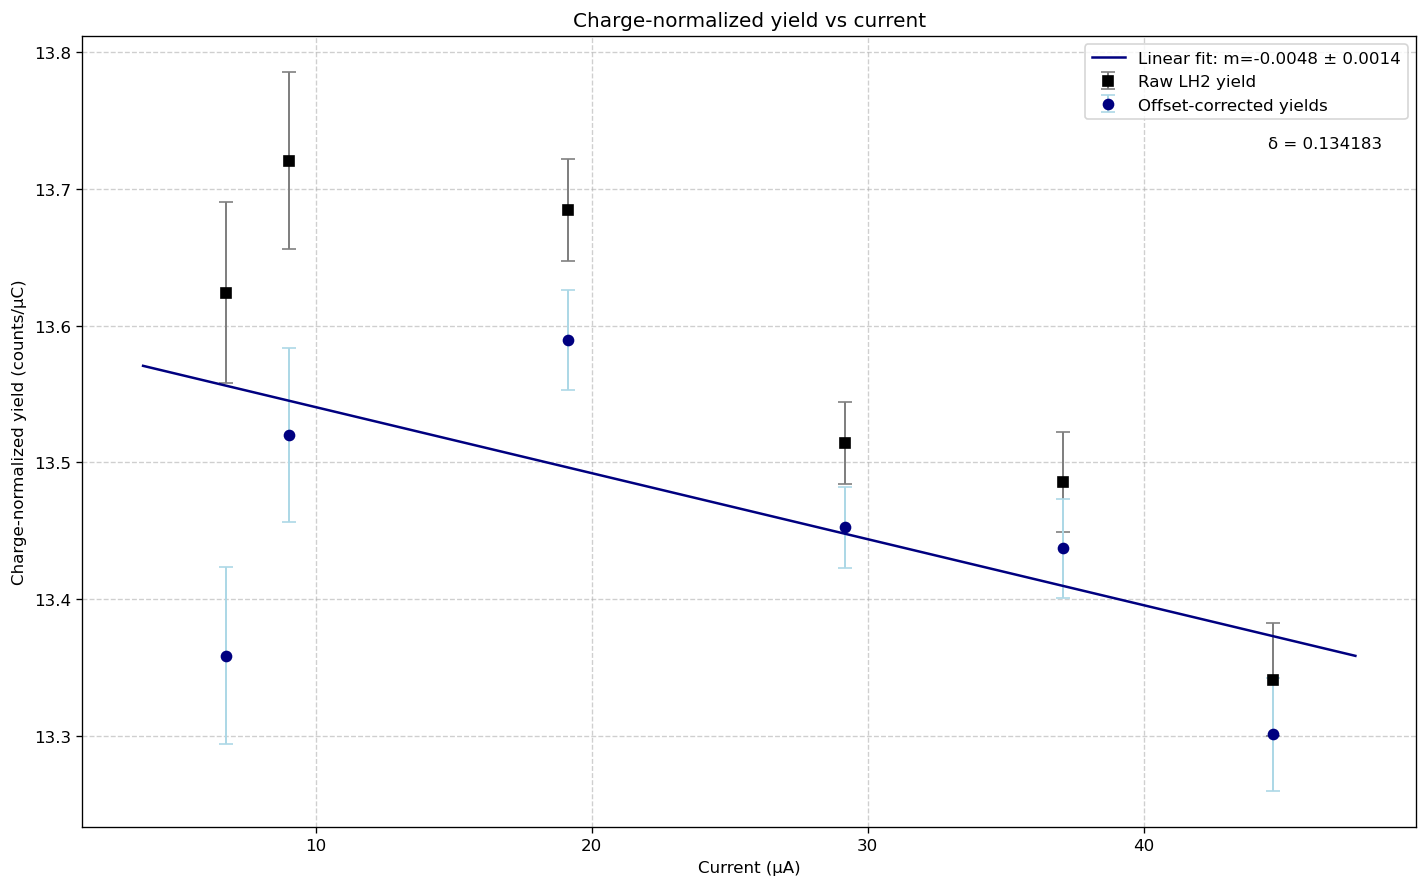

In [116]:
import numpy as np
from scipy.optimize import curve_fit, minimize_scalar, brentq, minimize
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/Users/juliogutierrez/Downloads/R-sidis_analysis/LH2.csv", sep="|")

run_num = df["run_number"].to_numpy();
I=df["current"].to_numpy();
Q=df["charge"].to_numpy();
eff=df["efficiency"].to_numpy();
dead=df["deadtime"].to_numpy();
N=df["yield"].to_numpy();
PS4=df["PS4"].to_numpy();

norm=(PS4)/(Q*eff*dead)
Y_norm=N*norm
error=np.sqrt(N)*norm

δ = 0.134183

# Compute corrected yield with the optimized offset applied
factor = 1 + δ/I
Y_corr = Y_norm / factor
err_corr = error / factor

# Linear fit to the corrected LH2 yield

def line_model(I, m, I0):
    return m * I + I0

popt_line, pcov_line = curve_fit(line_model, I, Y_corr,
                                 sigma=err_corr, absolute_sigma=True)
m_fit, b_fit = popt_line
m_err, b_err = np.sqrt(np.diag(pcov_line))

I_fit = np.linspace(min(I)-3, max(I)+3, 300)


fig, ax = plt.subplots(figsize=(12,7.5), dpi=120)

# Raw LH2 yield
ax.errorbar(I, Y_norm, yerr=error, fmt='s', color='black', ecolor='gray',
            elinewidth=1.2, capsize=4, label="Raw LH2 yield")

# Offset-corrected yield
ax.errorbar(I, Y_corr, yerr=err_corr, fmt='o', color='navy',
            ecolor='lightblue', elinewidth=1.2, capsize=4, label="Offset-corrected yields")

ax.plot(I_fit, line_model(I_fit, m_fit, b_fit), color="navy", linestyle='-',
        label=f"Linear fit: m={m_fit:.2} ± {m_err:.2}")


ax.annotate(text= "δ = 0.134183", xy=[44.5,13.73])

ax.set_title("Charge-normalized yield vs current")
ax.set_xlabel("Current (µA)")
ax.set_ylabel("Charge-normalized yield (counts/µC)")
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(frameon=True)
plt.tight_layout()
# plt.ylim(17,17.8)
plt.show()